In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import joblib
df = pd.read_pickle('df.pkl')

In [4]:
x_train, x_test, y_train, y_test = train_test_split( df.drop('target',axis=1), df['target'], test_size = 0.2, random_state=42)

In [18]:
logreg_model = LogisticRegression(random_state=42, solver='liblinear') # Using
logreg_model.fit(x_train, y_train)
y_pred_logreg = logreg_model.predict(x_test)

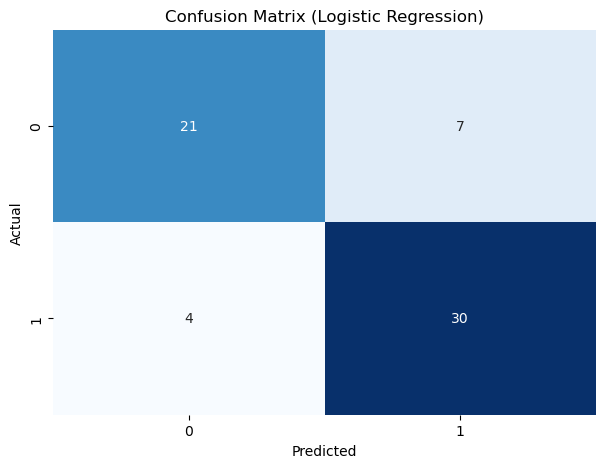

In [19]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(7,5))
sns.heatmap(cm_logreg, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [6]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [10]:
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(x_train_scaled, y_train)
y_pred_dt = dt_model.predict(x_test_scaled)

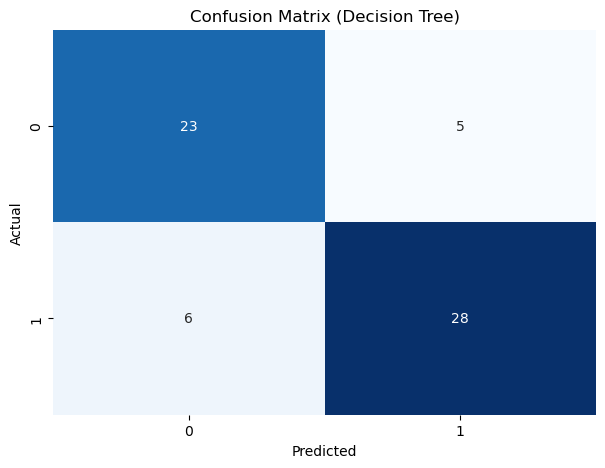

In [20]:
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix (Decision Tree)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [26]:
rand_forst=RandomForestClassifier(random_state=42)
rand_forst.fit(x_train_scaled, y_train)
y_pred_rand_forst = rand_forst.predict(x_test_scaled)

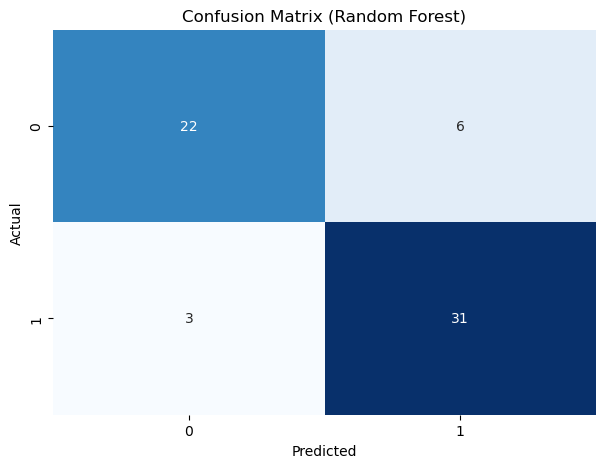

In [27]:
cm_rand_forst = confusion_matrix(y_test, y_pred_rand_forst)
plt.figure(figsize=(7, 5))
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_train_scaled, y_train)
y_pred_svm = svm_model.predict(x_test_scaled)

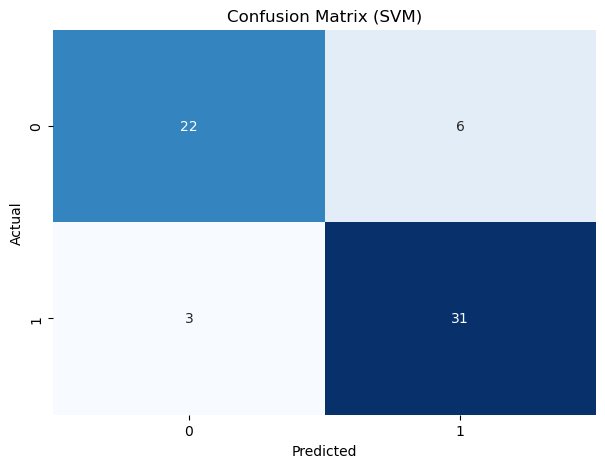

In [24]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(7, 5))
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
print("=== Decision Tree (ID3) Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

=== Decision Tree (ID3) Evaluation ===
Accuracy: 0.8225806451612904
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.85      0.82      0.84        34

    accuracy                           0.82        62
   macro avg       0.82      0.82      0.82        62
weighted avg       0.82      0.82      0.82        62

Confusion Matrix:
 [[23  5]
 [ 6 28]]


In [29]:
print("=== SVM Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

=== SVM Evaluation ===
Accuracy: 0.8548387096774194
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83        28
           1       0.84      0.91      0.87        34

    accuracy                           0.85        62
   macro avg       0.86      0.85      0.85        62
weighted avg       0.86      0.85      0.85        62

Confusion Matrix:
 [[22  6]
 [ 3 31]]


In [30]:
print("=== Random Forest Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rand_forst))
print("Classification Report:\n", classification_report(y_test, y_pred_rand_forst))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rand_forst))

=== Random Forest Evaluation ===
Accuracy: 0.8387096774193549
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.86        34

    accuracy                           0.84        62
   macro avg       0.84      0.83      0.84        62
weighted avg       0.84      0.84      0.84        62

Confusion Matrix:
 [[22  6]
 [ 4 30]]


In [31]:
print("=== Decision Tree (ID3) Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

=== Decision Tree (ID3) Evaluation ===
Accuracy: 0.8225806451612904
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.81      0.88      0.85        34

    accuracy                           0.82        62
   macro avg       0.83      0.82      0.82        62
weighted avg       0.82      0.82      0.82        62

Confusion Matrix:
 [[21  7]
 [ 4 30]]


In [33]:
test_df = pd.DataFrame(
    {'True': y_test, 'Logistic': y_pred_logreg, 'RandomForest': y_pred_rand_forst, 'DecisionTree': y_pred_dt, 'SVM': y_pred_svm})

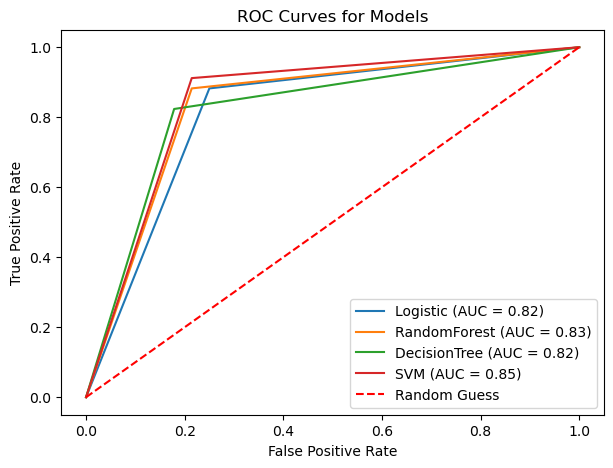

In [35]:
plt.figure(figsize=(7, 5))

for model in ['Logistic', 'RandomForest', 'DecisionTree', 'SVM']:
    fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Models')
plt.legend()
plt.show()

In [40]:
joblib.dump(svm_model, 'final_model.pkl')

['final_model.pkl']